### Logistic Regression Basics :

Logistic regression is a machine learning algorithm used for classification problem. It is based on concept of probability and one of the best and simple method for predictive analysis.
Logistic regression is modified version of simple linear regression. Logistic regression uses much complex cost function (called sigmoid function) than linear regression as it produce values between 0 and 1 while linear regression can produce anything between negative infinity to positive infinity.As through logistic regression we calculate the probabilities and the probabilities are bounded in nature between 0 and 1 , we calculate odds or odds ratioof an event which is defined as 

\begin{align}
odds= \frac{p}{1-p}= \frac{probability of event}{1- probability of event}
\end{align}

odds has a range from 0 to positive infinity

where p= P(Y=1)
In logistic regression we take the logit or log odds of events being linear to the predictor variables. We calculate the the logs to scale down the odds value

\begin{align}
z =ln(\frac{p}{1-p})=\beta_{0}x_{0}+\beta_{1}x_{1}+\beta_{2}x_{2}+\beta_{3}x_{3}+------+\beta_{n}x_{n}
\end{align}

### Assumptions:


a. Dependent variable has to be categorical in nature

b. P(Y=1)is the probability of occurrence of event where Y is the target variable

c. Error terms need to be independent.Logistic regression requires each observation to be independent.

d. Model should have little or nomulticollinearity

e. Logistic regression assumes linearity of independent variables and logodds

f. Sample size should be large enough

### Classification:

Classification can be of text data, tabular (structured) data, image classification and some more. Classification is majorly of two broader types

1. Binary:only 2 classes- (pass , fail) which can be labled as 0 and 1

2. Multi class: More than 2 Classes- (Low, Medium , High) Can be represented as 0, 1 and 2

Some of the examples of classification problems are, Emails can be spam/non spam, online transactions can be fraud or valid, Tumor malignant or benign. Logistic regression uses labeled data for training and use a sigmoid function to return the probabilities in the end, which can be used to determine the class of a particular test input.

Hypothesis Representation :
For linear regression we use following equation for hypothesis.
\begin{align}
y = w^T x+b
\end{align}
 
Where wT is the transpose of weight(Coefficient) matrix and b is bias, for the simplicity we can consider it as equation of line y=mx+c.
For logistic regression we modify it in the form of a sigmoid functtion.sigmoid function returns the probability from logit function.

\begin{align}
y ̂=σ(w^T x+b)
\end{align}

\begin{align}
σ(z)=  1/(1+\mathrm{e}^{-z} )
\end{align}
\begin{align}
y ̂=1/(1+e^(-(w^T x+b)))
\end{align}


In [3]:
import numpy as np
import pandas as pd
def sigmoid(z):
  return 1.0 / (1 + np.exp(-z))

### Decision Boundary :

Our current prediction function returns a probability score between 0 and 1. In order to map this to a discrete class (true/false, cat/dog), we select a threshold value or tipping point above which we will classify values into class 1 and below which we classify values into class 2.

p≥0.5,class=1

p<0.5,class=0

For example, if our threshold was .5 and our prediction function returned .7, we would classify this observation as positive. If our prediction was .2 we would classify the observation as negative. For logistic regression with multiple classes we could select the class with the highest predicted probability.

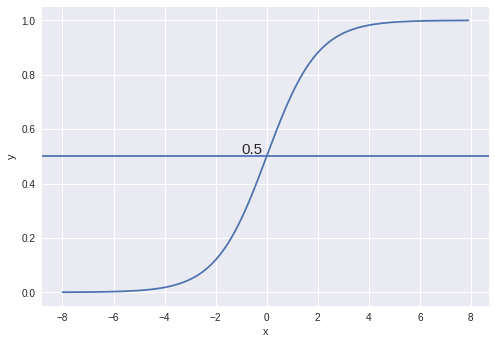

### Code for Prediction :

In [4]:
def predict(features, weights):
  '''
  Returns 1D array of probabilities
  that the class label == 1
  '''
 
  z = np.dot(features,weights) #Gives the logit or log of odds function mentioned in the beginning of the article
  x=sigmoid(z)
      return x#sigmoid function converts the logit into probabilities

### Dataset For Implementation: 

Dataset:
The dataset contains three independent variables gmat, gpa and work_experiencewhich stands for GMAT score, GPA score and workexperience of candidates. The target variable is 'admitted' - which stands for the status of candidates if they got an admit or not

In [6]:
import pandas as pd
candidates = {'gmat': [780,750,690,710,680,730,690,720,740,690,610,690,710,680,770,610,580,650,540,590,620,600,550,550,570,670,660,580,650,660,640,620,660,660,680,650,670,580,590,690],
              'gpa': [4,3.9,3.3,3.7,3.9,3.7,2.3,3.3,3.3,1.7,2.7,3.7,3.7,3.3,3.3,3,2.7,3.7,2.7,2.3,3.3,2,2.3,2.7,3,3.3,3.7,2.3,3.7,3.3,3,2.7,4,3.3,3.3,2.3,2.7,3.3,1.7,3.7],
              'work_experience': [3,4,3,5,4,6,1,4,5,1,3,5,6,4,3,1,4,6,2,3,2,1,4,1,2,6,4,2,6,5,1,2,4,6,5,1,2,1,4,5],
              'admitted': [1,1,1,1,1,1,0,1,1,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0,0,0,1]
              }

df = pd.DataFrame(candidates,columns= ['gmat', 'gpa','work_experience','admitted'])
print (df)

    gmat  gpa  work_experience  admitted
0    780  4.0                3         1
1    750  3.9                4         1
2    690  3.3                3         1
3    710  3.7                5         1
4    680  3.9                4         1
5    730  3.7                6         1
6    690  2.3                1         0
7    720  3.3                4         1
8    740  3.3                5         1
9    690  1.7                1         0
10   610  2.7                3         0
11   690  3.7                5         1
12   710  3.7                6         1
13   680  3.3                4         1
14   770  3.3                3         1
15   610  3.0                1         0
16   580  2.7                4         0
17   650  3.7                6         1
18   540  2.7                2         0
19   590  2.3                3         0
20   620  3.3                2         0
21   600  2.0                1         0
22   550  2.3                4         0
23   550  2.7   

### Cost Function: 

The objective of cost function is to be minimized, so that model we prepared will have better accuracy and minimum total error.
In linear regression we use sum of squared error as our cost function but that cannot be used for logistic regression. If we try to use linear regression cost function for logistic regression, it will end up creating a non-convex function with many local optima(minima and maxima) and it will be very difficult to minimize cost function to get global minima.

So, the loss function for logistic regression can be defined as

\begin{align}
L(y ,\hat{y})= -ylog(\hat{y}) -(1-y)log⁡(1-\hat{y})
\end{align}


If y=1; 

\begin{align}
L(y,\hat{y}) = -log(\hat{y})
\end{align}
Intuition is, 
We want log(ŷ) large, so we want ŷ to be large, which can’t be greater than 1, because of sigmoid.
 
If y=0;  
\begin{align}
L(y,\hat{y}) = -log(1-\hat{y})
\end{align}
We want log(1-ŷ) large, so we want ŷ to be small, which can’t be smaller than 0, because of sigmoid.

It can be written as,

\begin{align}
J(w,b)= \frac{1}{m}\sum_{i=1}^{m} L(\hat{y}_i,y_i)
\end{align}


\begin{align}
J(w,b)= -\frac{1}{m}\sum_{i=1}^{m} (y_i log(\hat{y}_i)+(1-y_i)log(1-\hat{y}_i)
\end{align}



### Code For Cost Function: 

In [7]:
def cost_function(features, target, weights):
    '''
    Using Mean Absolute Error

    Features:(100,3)
    Labels: (100,1)
    Weights:(3,1)
    Returns 1D matrix of predictions
    Cost = (labels*log(predictions) + (1-labels)*log(1-predictions) ) / len(labels)
    '''
    observations = len(target)

    predictions = predict(features, weights)

    #Take the error when label=1
    class1_cost = -np.dot(target.T,np.log(predictions))

    #Take the error when label=0
    class2_cost = np.dot((1-target).T,np.log(1-predictions))

    #Take the sum of both costs
    cost = class1_cost - class2_cost

    #Take the average cost
    cost = cost.sum() / observations

    return cost

### Gradient :

To minimize our cost, we use Gradient Descent just like before in Linear Regression. There are other more sophisticated optimization algorithms out there such as conjugate gradient like BFGS, but you don’t have to worry about these. Machine learning libraries like Scikit-learn hide their implementations so you can focus on more interesting things!
Math
One of the neat properties of the sigmoid function is its derivative is easy to calculate. So as before we can calculate the partial derivatives of the 
\begin{align}
s^{\prime}(z)=s(z)(1−s(z))
\end{align}

Which leads to an equally beautiful and convenient cost function derivative:

\begin{align}
 C^{\prime} =x(s(z)−y)
\end{align}

Here s(z) is basically the prediction, y is the target and x is the feature

### Code for Gradient and coefficient estimation :

In [9]:
def update_weights(features, target, weights, lr):
    '''
    Vectorized Gradient Descent

    Features:(200, 3)
    Labels: (200, 1)
    Weights:(3, 1)
    '''
    N = len(features)

    #1 - Get Predictions
    predictions = predict(features, weights)
    #pred=pd.DataFrame(predictions)
   
    


    #2 Transpose features from (200, 3) to (3, 200)
    # So we can multiply w the (200,1)  cost matrix.
    # Returns a (3,1) matrix holding 3 partial derivatives --
    # one for each feature -- representing the aggregate
    # slope of the cost function across all observations
    gradient = np.dot(features.T,predictions-target.values)

    #3 Take the average cost derivative for each feature
    
    #4 - Multiply the gradient by our learning rate
    gradient/=N
    gradient*=lr
    

    #5 - Subtract from our weights to minimize cost
    weights -= gradient

    return weights,gradient

def train(features, target, weights, lr, iters):
    cost_history = []

    for i in range(iters):
        weights,gradient = update_weights(features, target, weights, lr)

        #Calculate error for auditing purposes
        cost = cost_function(features, target, weights)
        cost_history.append(cost)

        # Log Progress
        if i % 100 == 0:
            print(i,cost,gradient)

    return weights, cost_history
weight=[0,0,0]
wt=pd.DataFrame(weight)
X=['gmat','gpa','work_experience']
y=['admitted']
train(df[X],df[y],wt,0.005,300)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


0 nan [[-0.19375  ]
 [-0.00165  ]
 [-0.0038125]]
100 16.9812683031 [[ 1.44125  ]
 [ 0.0060875]
 [ 0.00475  ]]
200 nan [[ 1.44125  ]
 [ 0.0060875]
 [ 0.00475  ]]


(          0
 0 -0.832956
 1  0.215385
 2  0.831618,
 [nan,
  nan,
  nan,
  314.53058409374989,
  nan,
  172.77739146874981,
  nan,
  31.02419884374974,
  nan,
  nan,
  nan,
  nan,
  274.67818662499957,
  nan,
  132.92499399999951,
  nan,
  6.9065510758217759,
  nan,
  nan,
  nan,
  nan,
  234.82537503382872,
  nan,
  93.072182408828638,
  nan,
  nan,
  nan,
  nan,
  inf,
  nan,
  194.97297756507845,
  nan,
  53.219784940078355,
  nan,
  nan,
  nan,
  nan,
  296.87377272132818,
  nan,
  155.12058009632813,
  nan,
  13.367387471572005,
  nan,
  nan,
  nan,
  nan,
  257.02137550579249,
  nan,
  115.26818288079241,
  nan,
  nan,
  nan,
  nan,
  inf,
  nan,
  217.16897803704222,
  nan,
  75.41578541204214,
  nan,
  nan,
  nan,
  nan,
  319.06977319329201,
  nan,
  177.3165805682919,
  nan,
  35.563387943291843,
  nan,
  nan,
  nan,
  nan,
  279.21737572454168,
  nan,
  137.4641830995416,
  nan,
  3.1535998106335299,
  nan,
  nan,
  nan,
  nan,
  238.43925586560272,
  nan,
  96.686063240602

### Explanation:

 The cost function calculates the cost or error for logistic regression predictions -so we can see how the error changes with change in logistic regression coeefficients and from the function we can get the minimum error after some iterations and we can use coefficient estimates for the corresponding value of the cost estimate to estimate best set of coefficient estimates. The update_weights function changes coefficients using the gradient of the cost function to estimate the best set of coefficients


### Questionarrie :



1. What does Oddsratio>1 imply?

2. What is complete separation and quasi complete separation problem in Logistic regression?

3. Why can't we use the same cost function of MSE in case of logistic regression as we did in case of linear regression?

4. What is the role of VIF(Variable inflation factor) in logistic regression variable selection process?

5. In what situation Oversampling is used in modelling process?

6. What are the disadvantages for Logistic regression?



[Solutions](Solutions.ipynb)